In [5]:
import json
import pandas as pd

# Cargar archivo JSON
with open('../raw_data/weather_data_20250723_161002.json') as f:
    data = json.load(f)

In [6]:
# Extraer info general
latitude = data['latitude']
longitude = data['longitude']
timezone = data['timezone_abbreviation']
units = data['hourly_units']

In [7]:
# Crear DataFrame con los datos de interés
df = pd.DataFrame(data['hourly'])

# Convertir a datetime
df['time'] = pd.to_datetime(df['time'])


In [8]:
print(f"📍 Coordenadas: ({latitude}, {longitude}) | Zona horaria: {timezone}")
print(f"Columnas y unidades: {units}")

📍 Coordenadas: (19.375, -99.125) | Zona horaria: GMT
Columnas y unidades: {'time': 'iso8601', 'temperature_2m': '°C'}


In [17]:
print(df.head())

                 time  temperature_2m
0 2025-07-23 00:00:00            22.9
1 2025-07-23 01:00:00            21.2
2 2025-07-23 02:00:00            19.3
3 2025-07-23 03:00:00            17.9
4 2025-07-23 04:00:00            16.9


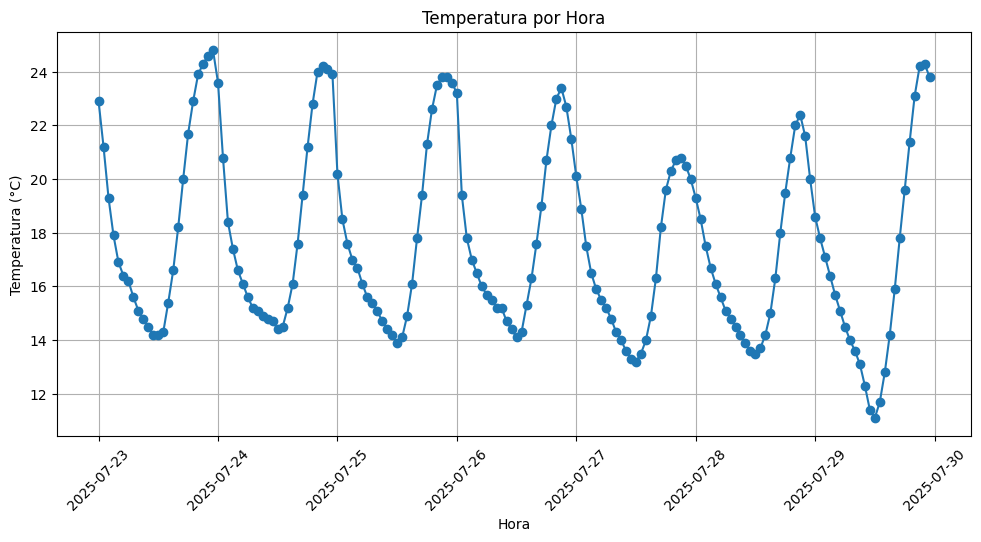

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['temperature_2m'], marker='o')
plt.title('Temperatura por Hora')
plt.xlabel('Hora')
plt.ylabel(f"Temperatura ({units['temperature_2m']})")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [18]:
# Añadir columna con el día de la semana
df['day'] = df['time'].dt.day_name()

# Añadir columna con la hora
df['hour'] = df['time'].dt.hour

# Verificamos las primeras filas
print(df.head())


                 time  temperature_2m        day  hour
0 2025-07-23 00:00:00            22.9  Wednesday     0
1 2025-07-23 01:00:00            21.2  Wednesday     1
2 2025-07-23 02:00:00            19.3  Wednesday     2
3 2025-07-23 03:00:00            17.9  Wednesday     3
4 2025-07-23 04:00:00            16.9  Wednesday     4
